<a href="https://colab.research.google.com/github/AlekhyaGangopadhyay/My_ML_Projects/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 6**

**Rainfall Prediction**

**WorkFlow=> Data Collection -->EDA --> Data Preprocessing --> Train Test split --> Random Forest --> Hyperparameter Tuning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.utils import resample

In [2]:
data=pd.read_csv('/content/Rainfall.csv')
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [3]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [4]:
data.shape

(366, 12)

In [5]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [7]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [8]:
data.columns=data.columns.str.strip()#removing extra spaces in columns

In [9]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [10]:
data=data.drop(columns=['day'])
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [11]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [12]:
data['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [13]:
data['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [14]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


**Handeling the missing values**

In [15]:
# handle missing values
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median())

In [16]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [17]:
print(data)

     pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0      1025.9     19.9         18.3     16.8      13.1        72     49   
1      1022.0     21.7         18.9     17.2      15.6        81     83   
2      1019.7     20.3         19.3     18.0      18.4        95     91   
3      1018.9     22.3         20.6     19.1      18.8        90     88   
4      1015.9     21.3         20.7     20.2      19.9        95     81   
..        ...      ...          ...      ...       ...       ...    ...   
361    1022.7     18.8         17.7     16.9      15.0        84     90   
362    1026.6     18.6         17.3     16.3      12.8        75     85   
363    1025.9     18.9         17.7     16.4      13.3        75     78   
364    1025.3     19.2         17.3     15.2      13.3        78     86   
365    1026.4     20.5         17.8     15.5      13.0        74     66   

    rainfall  sunshine  winddirection  windspeed  
0        yes       9.3           80.0       26.3

In [18]:
data.shape

(366, 11)

In [19]:
data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [20]:
data['rainfall']=data['rainfall'].map({"yes":1,"no":0})

In [21]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [22]:
data.tail()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9
365,1026.4,20.5,17.8,15.5,13.0,74,66,0,5.7,20.0,23.3


In [23]:
data['rainfall'].unique()

array([1, 0])

#**Exploratory Data Analysis**

In [24]:
data.shape

(366, 11)

In [25]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [26]:
sns.set(style='whitegrid')

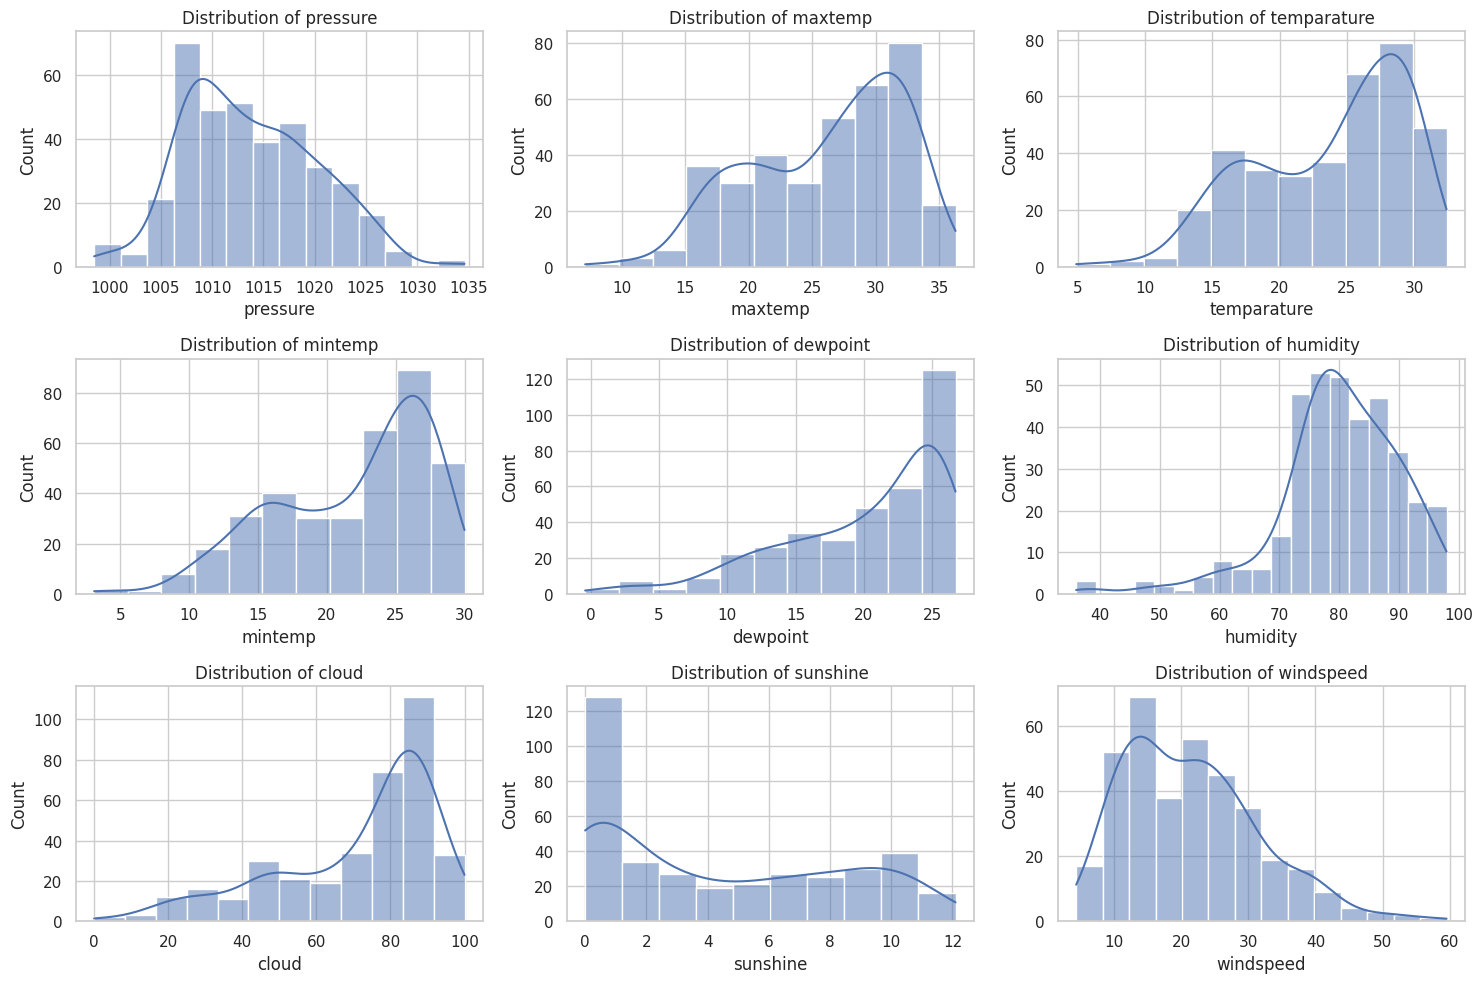

In [27]:
plt.figure(figsize=(15,10))

for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud','sunshine','windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(data[column],kde=True)
  plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

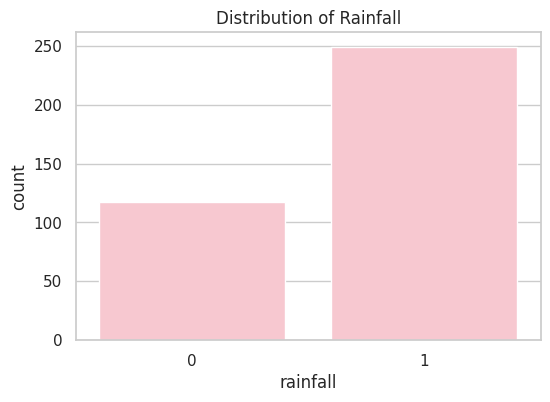

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x="rainfall", data=data ,color='pink')
plt.title("Distribution of Rainfall")
plt.show()

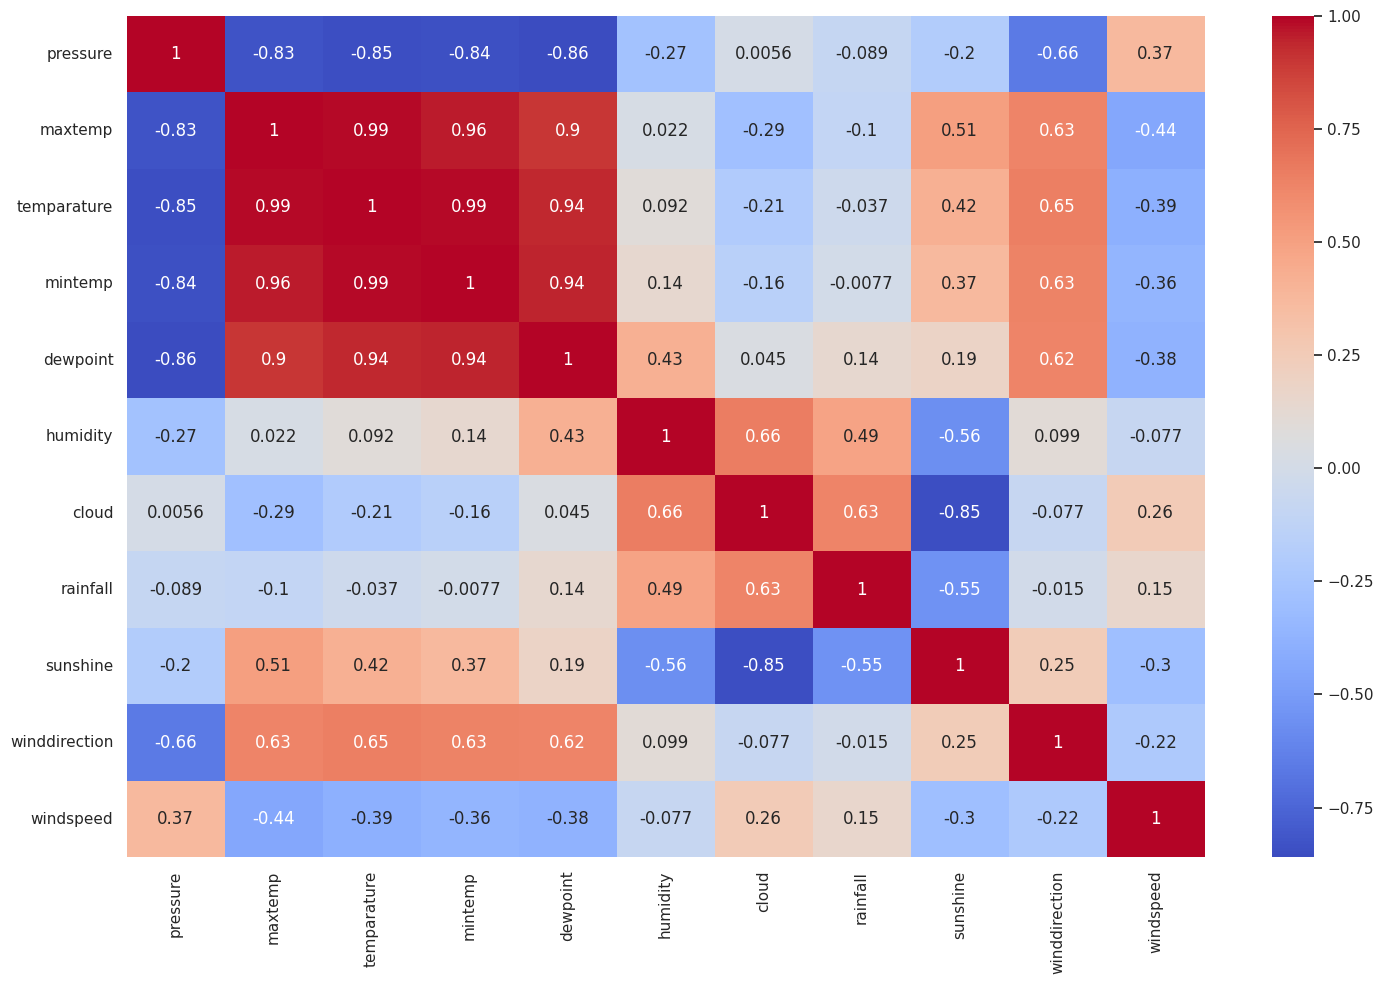

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.tight_layout()
plt.show()

In [30]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [31]:
data=data.drop(columns=['maxtemp','temparature','mintemp'])
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [32]:
data['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [33]:
df_majority=data[data['rainfall']==1]
df_minority=data[data['rainfall']==0]

In [34]:
print(df_majority.shape)

(249, 8)


In [35]:
print(df_minority.shape)

(117, 8)


In [36]:
#downsampeling
df_majority_downsampled=resample(df_majority,n_samples=len(df_minority),random_state=42)

In [37]:
df_majority_downsampled.shape

(117, 8)

In [38]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority])

In [39]:
df_downsampled.shape

(234, 8)

In [40]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
144,1007.9,24.1,82,61,1,7.6,180.0,7.4
259,1011.9,24.5,81,86,1,2.1,70.0,32.2
132,1009.8,21.4,80,78,1,5.0,70.0,28.6
21,1018.9,12.9,92,100,1,0.0,50.0,35.3
148,1007.6,25.6,89,89,1,1.2,200.0,24.0


In [41]:
df_downsampled.tail()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
351,1025.9,-0.4,39,25,0,9.1,20.0,35.6
352,1026.4,3.1,48,11,0,9.5,40.0,25.2
353,1025.4,8.7,62,71,0,2.1,30.0,29.0
360,1020.6,13.3,74,87,0,0.6,30.0,21.6
365,1026.4,13.0,74,66,0,5.7,20.0,23.3


In [42]:
df_downsampled=df_downsampled.sample(frac=1,random_state=42)

In [43]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
123,1011.4,23.9,86,84,1,3.1,220.0,11.8
290,1013.4,19.5,69,17,0,10.5,70.0,12.4
217,1006.1,24.4,74,27,0,10.8,220.0,8.7
166,1005.3,26.3,79,86,1,1.6,210.0,29.3
35,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [44]:
df_downsampled['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


In [45]:
x=df_downsampled.drop(columns=['rainfall'])
y=df_downsampled['rainfall']

In [46]:
print(x)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
123    1011.4      23.9        86     84       3.1          220.0       11.8
290    1013.4      19.5        69     17      10.5           70.0       12.4
217    1006.1      24.4        74     27      10.8          220.0        8.7
166    1005.3      26.3        79     86       1.6          210.0       29.3
35     1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
285    1019.0      16.8        67     88       0.0           50.0       28.2
121    1011.5      20.9        92     90       0.5           50.0       23.7
79     1014.7      17.4        91     96       0.0           50.0       28.0
216    1008.3      24.1        74     29       5.7           10.0        4.4
20     1017.7      15.3        95    100       0.0           50.0       26.2

[234 rows x 7 columns]


In [47]:
print(y)

123    1
290    0
217    0
166    1
35     0
      ..
285    1
121    1
79     1
216    0
20     1
Name: rainfall, Length: 234, dtype: int64


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)

(163, 7) (71, 7)


In [49]:
model=RandomForestClassifier()
ParameterGrid_model={
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [50]:
grid_search_model=GridSearchCV(estimator=model,param_grid=ParameterGrid_model,cv=5)
grid_search_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [51]:
best_model=grid_search_model.best_estimator_
print(best_model)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5)


In [52]:
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores*100)
print("Mean cross-validation score:", np.mean(cv_scores*100))

Cross-validation scores: [78.78787879 75.75757576 87.87878788 81.25       87.5       ]
Mean cross-validation score: 82.23484848484847


In [53]:
y_prediction=best_model.predict(x_test)
print("Test set Accuracy:", accuracy_score(y_test, y_prediction))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_prediction))
print("Classification Report:\n", classification_report(y_test, y_prediction))

Test set Accuracy: 0.6901408450704225
Test set Confusion Matrix:
 [[19 13]
 [ 9 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.59      0.63        32
           1       0.70      0.77      0.73        39

    accuracy                           0.69        71
   macro avg       0.69      0.68      0.68        71
weighted avg       0.69      0.69      0.69        71



#**Predictive System**

In [56]:
input_data=(1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_data_as_dataframe=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])



In [57]:
input_data_as_dataframe

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [58]:
prediction=best_model.predict(input_data_as_dataframe)


In [59]:
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


In [61]:
# save model and feature names to a pickle file
model_data = {"model": best_model, "feature_names": x.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)

#**Load the saved model and file and use it for prediction**

In [62]:
import pickle
import pandas as pd

In [63]:
# load the trained model and feature names from the pickle file
with open("rainfall_prediction_model.pkl", "rb") as file:
  model_data = pickle.load(file)

In [64]:
model = model_data["model"]
feature_names = model_data["feature_names"]

In [65]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=feature_names)

In [67]:
prediction = best_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall
